<a href="https://colab.research.google.com/github/namanverma16/Cyber_Threat_Analysis/blob/main/Cyber_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***6th Semester Mini Project***

**Importing necessary libraries**

In [ ]:
import zipfile
import numpy as np

# Extracting the zip file containing the dataset
zip_ref = zipfile.ZipFile("CSTR data files.zip", 'r')
zip_ref.extractall("/content/sample_data")
zip_ref.close()

**Importing the scipy library to load .mat files**

In [ ]:
import scipy.io
Tr_attack = scipy.io.loadmat('/content/sample_data/CSTR_train_attack.mat')
Tr_noise = scipy.io.loadmat('/content/sample_data/CSTR_train_noise.mat')
Tr_normal = scipy.io.loadmat('/content/sample_data/CSTR_train_normal.mat')
Te_attack = scipy.io.loadmat('/content/sample_data/CSTR_test_attack.mat')
Te_noise = scipy.io.loadmat('/content/sample_data/CSTR_test_noise.mat')
Te_normal = scipy.io.loadmat('/content/sample_data/CSTR_test_normal.mat')

**Printing the loaded datasets to inspect their contents**

In [ ]:
print(Tr_attack)
print(Tr_noise)
print(Tr_normal)
print(Te_attack)
print(Te_noise)
print(Te_normal)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Jan 13 19:18:52 2023', '__version__': '1.0', '__globals__': [], 'CSTR_train_attack': array([[279.6853545 , 219.57020743, 197.72234186, ..., 235.96534467,
        235.90655891,   1.        ],
       [284.3864336 , 234.61971   , 209.93598274, ..., 235.91516102,
        236.05535538,   1.        ],
       [293.21831723, 249.04203147, 220.89269193, ..., 235.95081917,
        235.95210503,   1.        ],
       ...,
       [328.0485413 , 275.40201266, 261.7118202 , ..., 235.9498    ,
        235.91679269,   1.        ],
       [335.97388804, 258.64809773, 218.61281335, ..., 235.92889698,
        235.95308579,   1.        ],
       [348.01699668, 257.7146681 , 219.67494517, ..., 235.90267148,
        235.90188937,   1.        ]])}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Jan 13 19:18:52 2023', '__version__': '1.0', '__globals__': [], 'CSTR_train_noise': array([[279.6853545 , 219.57020743,

**Extracting the data from the loaded .mat files into numpy arrays**

In [ ]:
Train_attack = Tr_attack['CSTR_train_attack']
Train_noise = Tr_noise['CSTR_train_noise']
Train_Normal = Tr_normal['CSTR_train_normal']
Test_attack = Te_attack['CSTR_test_attack']
Test_noise = Te_noise['CSTR_test_noise']
Test_Normal = Te_normal['CSTR_test_normal']

**Printing the shapes of the datasets to verify their sizes**

In [ ]:
print("The size of the training dataset for Attack",Train_attack.shape)
print("The size of the training dataset for Noise",Train_noise.shape)
print("The size of the training dataset for Normal",Train_Normal.shape)
print("The size of the testing dataset for Attack",Test_attack.shape)
print("The size of the testing dataset for Noise",Test_noise.shape)
print("The size of the testing dataset for Normal",Test_Normal.shape)

The size of the training dataset for Attack (694, 201)
The size of the training dataset for Noise (694, 201)
The size of the training dataset for Normal (694, 201)
The size of the testing dataset for Attack (15, 201)
The size of the testing dataset for Noise (15, 201)
The size of the testing dataset for Normal (15, 201)


**Combining the training data from all categories (Attack, Noise, Normal)**

In [ ]:
Combined_training = []
for x in Train_attack[:,:-1]:
  Combined_training.append(x)
for x in Train_noise[:,:-1]:
  Combined_training.append(x)
for x in Train_Normal[:,:-1]:
  Combined_training.append(x)

**Printing the shape of the combined training set**

In [ ]:
Combined_training =np.array(Combined_training)
print("The combined training set",Combined_training.shape)

The combined training set (2082, 200)


**Combining the target labels from all training datasets**

In [ ]:
Training_target = []
for x in Train_attack[:,-1]:
  Training_target.append(x)
for x in Train_noise[:,-1]:
  Training_target.append(x)
for x in Train_Normal[:,-1]:
  Training_target.append(x)

Converts the target list into numpy array from all diffrent type of labels it will return total number of labels

In [ ]:
Training_target = np.array(Training_target)
#Printing the shape of the combined testing set
print("The combined target training set",Training_target.shape)

The combined target training set (2082,)


**Combining the testing data from all categories (Attack, Noise, Normal)**

In [ ]:
Combined_testing = []
for x in Test_attack[:,:-1]:
  Combined_testing.append(x)
for x in Test_noise[:,:-1]:
  Combined_testing.append(x)
for x in Test_Normal[:,:-1]:
  Combined_testing.append(x)

In [ ]:
Combined_testing = np.array(Combined_testing)

#Printing the shape of the combined testing set
print("The combined target testing set",Combined_testing.shape)

The combined target testing set (45, 200)


**Combining the target labels from all testing datasets**

In [ ]:
Target_testing = []
for x in Test_attack[:,-1]:
  Target_testing.append(x)
for x in Test_noise[:,-1]:
  Target_testing.append(x)
for x in Test_Normal[:,-1]:
  Target_testing.append(x)

In [ ]:
Target_testing = np.array(Target_testing)

# Printing the shape of the combined testing target set
print("The combined target testing set",Target_testing.shape)

The combined target testing set (45,)


**Converting the target labels to one-hot encoded format using OneHotEncoder **perform one hot encoding on target labels for both training and testing data set





In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
target_total_train = enc.fit_transform(Training_target.reshape(-1,1))
target_total_train = np.array(target_total_train)
target_total_test = enc.fit_transform(Target_testing.reshape(-1,1))
target_total_test = np.array(target_total_test)

#Printing the shapes of the one-hot encoded target sets
print("Total Testing size: ",target_total_test.shape)
print("Total Training size: ",target_total_train.shape)

Total Testing size:  (45, 3)
Total Training size:  (2082, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Building a neural network model using Keras**

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[200,]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

**Compiling the model with categorical crossentropy loss and Adam optimizer**
how to compile and train model

In [ ]:
from keras import losses
#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=True),
metrics=["accuracy"])
hist = model.fit(Combined_training, target_total_train,epochs=1000, steps_per_epoch=2,validation_steps=2,validation_data = (Combined_testing,target_total_test))

Epoch 1/1000
2/2 [==============================] - 2s 260ms/step - loss: 25.1450 - accuracy: 0.3333 - val_loss: 51.6928 - val_accuracy: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 46ms/step - loss: 24.8376 - accuracy: 0.3333 - val_loss: 50.8766 - val_accuracy: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 65ms/step - loss: 24.5306 - accuracy: 0.3333 - val_loss: 50.0557 - val_accuracy: 0.3333
Epoch 4/1000
2/2 [==============================] - 0s 41ms/step - loss: 24.2322 - accuracy: 0.3333 - val_loss: 49.2388 - val_accuracy: 0.3333
Epoch 5/1000
2/2 [==============================] - 0s 55ms/step - loss: 23.9267 - accuracy: 0.3333 - val_loss: 48.4288 - val_accuracy: 0.3333
Epoch 6/1000
2/2 [==============================] - 0s 55ms/step - loss: 23.6224 - accuracy: 0.3333 - val_loss: 47.6248 - val_accuracy: 0.3333
Epoch 7/1000
2/2 [==============================] - 0s 37ms/step - loss: 23.3203 - accuracy: 0.3333 - val_loss: 46.8238 - val_accuracy: 0.333

**Plotting the training and validation loss and accuracy**

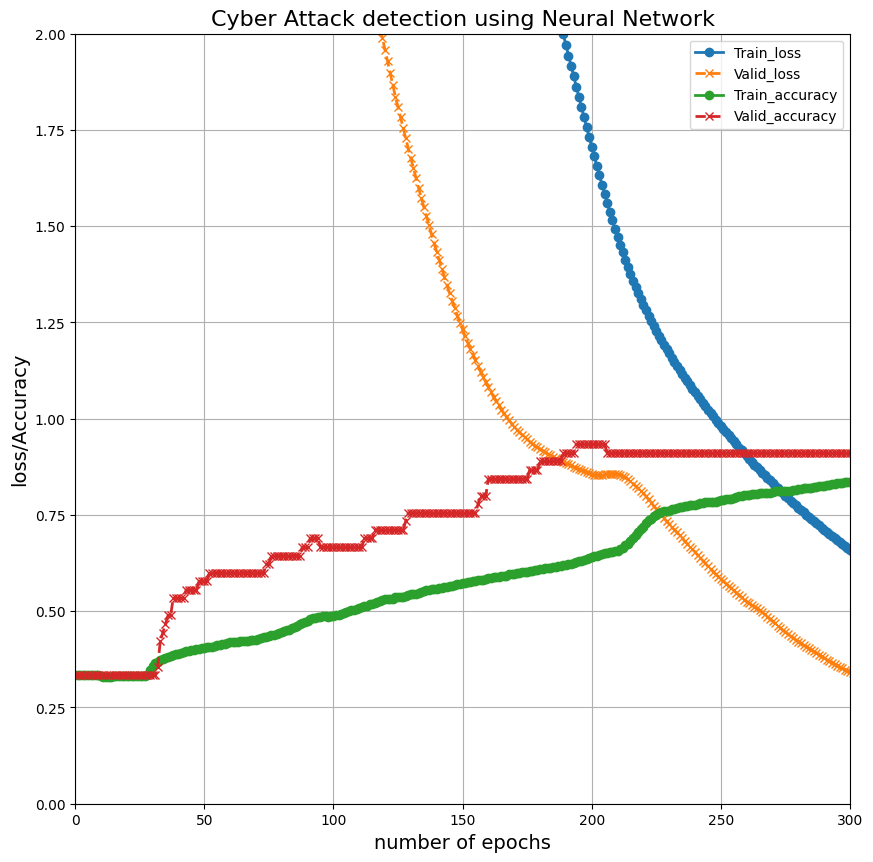

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(hist.history['loss'],label ="Train_loss",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_loss'],label ="Valid_loss",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.plot(hist.history['accuracy'],label ="Train_accuracy",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_accuracy'],label ="Valid_accuracy",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.gca().set_xlim(0, 300)
plt.gca().set_ylim(0, 2)
plt.xlabel('number of epochs', fontsize=14)
plt.ylabel('loss/Accuracy', fontsize=14)
plt.title('Cyber Attack detection using Neural Network',fontsize=16)
plt.legend()
plt.grid(True)

this graph show the training and validation loss and accuracy over the number of epochs for the neural netwrok model

**Evaluating the model on the training and testing set**

In [ ]:
score = model.evaluate(Combined_training, target_total_train, verbose=0)
print("Training Accuracy: ", score[1])
score = model.evaluate(Combined_testing, target_total_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9913544654846191
Testing Accuracy:  0.9777777791023254
